In [21]:
import pandas as pd
import numpy as np

from numpy import genfromtxt, savetxt
from numpy.linalg import norm

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches

import math

from schnetpack.datasets import QM9

import random

In [22]:
class distance_networks:
    def __init__(self,emb,label,value):
        self.emb = emb
        self.value = value
        self.label = label

        
        #calculate differences between target and embedding
        euc_dist = distance_networks.calculate_distances(value)
        #distane_networks
        distance_networks.distance_networks(euc_dist,value)       

    def calculate_distances(value):
        target = emb[value]
        euc_dist = np.zeros((len(emb)))
        for i in range(len(emb)):
            vec = emb[i]
            euc_dist[i] = norm(target - vec)
        return euc_dist
            
    def distance_networks(euc_dist,value):
        number_connections = 100
        data = np.zeros((number_connections+2,5))
        lower_bound = 0.0
        
        for i in range(1,number_connections+1):
            number_degenerates = int(data[i-1][3])
            print(number_degenerates)
            for k in range(number_degenerates+1):
                minimum = euc_dist[euc_dist>lower_bound].min()
                min_index = np.where(euc_dist == minimum)
                lower_bound = minimum
                data[i][0] = min_index[0]
                data[i][4] = minimum
        
            if data[i][0] not in data[0:i][0]:
                value = int(data[i][0])
                euc_dist = distance_networks.calculate_distances(value)

                theta = random.random()
                beta = random.choice((-1,1))
                
                data[i][1] = minimum*theta*beta
                data[i][2] = math.sqrt(minimum**2 - data[i][1]**2)
            for j in range(i):
                if data[i][0] == data[j][0]:
                    data[i][1] = data[j][1]
                    data[i][2] = data[j][2]
                    data[i][3] = data[i][3] + 1
                    value = int(data[i][0])
                    euc_dist = distance_networks.calculate_distances(value)

            print(i)
        print(data)
        fig1 = plt.figure(figsize=(5,4),dpi=100)
        ax1 = fig1.add_axes((0.1,0.1,0.9,0.9))
        ax1.plot(data[:,1],data[:,2],color='navy',alpha=0.75,lw=2,marker='o',
                 markerfacecolor='r',markersize=7,markeredgewidth=0.5)

        

0
1
0
2
0
3
0
4
0
5
0
6
0
7
1
8
0
9
0
10
0
11
0
12
0
13
0
14
0
15
0
16
0
17
1
18
0
19
0
20
0
21
0
22
0
23
0
24
1
25
1
26
1
27
0
28
1
29
0
30
0
31
0
32
2
33
0
34
0
35
0
36
0
37
0
38
0
39
0
40
1
41
0
42
1
43
1
44
1
45
0
46
1
47
0
48
2
49
0
50
2
51
0
52
0
53
0
54
3
55
0
56
1
57
0
58
0
59
0
60
1
61
0
62
4
63
0
64
1
65
0
66
0
67
0
68
0
69
0
70
0
71
1
72
1
73
0
74
1
75
0
76
2
77
0
78
0
79
0
80
0
81
0
82
0
83
0
84
0
85
0
86
0
87
0
88
0
89
2
90
0
91
2
92
0
93
0
94
0
95
0
96
0
97
0
98
0
99
5
100
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 2.02870000e+04  1.02834783e-01  3.56366433e-01  0.00000000e+00
   3.70907033e-01]
 [ 2.31020000e+04 -2.96022211e-01  2.35388184e-01  0.00000000e+00
   3.78201992e-01]
 [ 3.54200000e+03  1.52842309e-01  3.48828530e-01  0.00000000e+00
   3.80843951e-01]
 [ 2.02240000e+04 -3.63365398e-01  2.67009993e-01  0.00000000e+00
   4.50919892e-01]
 [ 2.03530000e+04 -2.94710605e-01  3.43538181e-01  0.00000000e+00
   4.52628791e-01

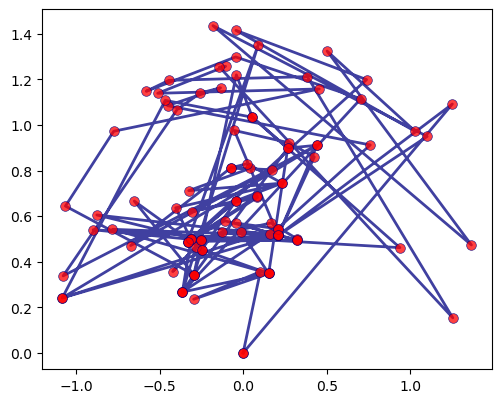

In [23]:
element = 'h'
embfilepath = '../../../data/main_data/embeddings/5000/pca%s.csv' %(element) 
labelfilepath = '../../../data/main_data/embeddings/5000/labelH.csv'

emb = np.genfromtxt(embfilepath,delimiter=',')
label = pd.read_csv(labelfilepath,delimiter=',')

# -2 the label file
# -1 the pca file
value = 173


distance_networks(emb,label,value)
